<a href="https://colab.research.google.com/github/Vicks-2019/Stock-Market-Analysis-using-Python-ML/blob/master/COVID-19_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#This is a sentiment analysis of covid - 19 outbreak using Python 
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [9]:
consumerKey=""
consumerSecret=""
accessToken=""
accessTokenSecret=""


In [10]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 

# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [15]:
# Extract 500 tweets from the twitter user
posts = api.user_timeline(screen_name="COVID19Tracking",count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) One major caveat today: Texas reported a backlog of 5k cases, which are included in today's numbers. Even for a Monday, which is subject to weekend lag, this is a very, very small number of cases.

2) Our daily update is published. States reported 647k tests, 38k cases, and 406 deaths. The number of cases reported is the lowest since June 23. https://t.co/omv9ZtWDoR

3) The South’s seven-day average for new cases per million people dropped to 205 from a July 22 peak of 315. In the West, the seven-day average is back up to 179 new cases per million people after a dip earlier this month related in part to CA’s reporting system problems. https://t.co/EHWvYw70s1

4) The number of people states report to be hospitalized with COVID-19 continues to drop. 57% of COVID-19 hospitalizations are currently in the South, while the Northeast has fallen to 5%. https://t.co/Qe3yI7uZi7

5) For those following the saga of Texas testing, we’re seeing a lot more tests reported

In [16]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,One major caveat today: Texas reported a backl...
1,Our daily update is published. States reported...
2,The South’s seven-day average for new cases pe...
3,The number of people states report to be hospi...
4,"For those following the saga of Texas testing,..."


In [17]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,One major caveat today: Texas reported a backl...
1,Our daily update is published. States reported...
2,The South’s seven-day average for new cases pe...
3,The number of people states report to be hospi...
4,"For those following the saga of Texas testing,..."
...,...
95,We get into the broader dynamics of falling ca...
96,But there is good news to report as well. The ...
97,California is now 3 in the United States for t...
98,Texas recently changed the way it counts COVID...


In [18]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,One major caveat today: Texas reported a backl...,0.451111,-0.143056
1,Our daily update is published. States reported...,0.000000,0.000000
2,The South’s seven-day average for new cases pe...,0.372727,-0.003896
3,The number of people states report to be hospi...,0.400000,0.000000
4,"For those following the saga of Texas testing,...",0.273333,0.240000
...,...,...,...
95,We get into the broader dynamics of falling ca...,0.500000,0.000000
96,But there is good news to report as well. The ...,0.500000,0.204167
97,California is now 3 in the United States for t...,0.471818,-0.025455
98,Texas recently changed the way it counts COVID...,0.125000,0.000000


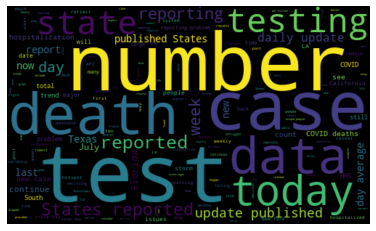

In [19]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [23]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
   return 'Neutral'
  else:
   return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,One major caveat today: Texas reported a backl...,0.451111,-0.143056,Negative
1,Our daily update is published. States reported...,0.000000,0.000000,Neutral
2,The South’s seven-day average for new cases pe...,0.372727,-0.003896,Negative
3,The number of people states report to be hospi...,0.400000,0.000000,Neutral
4,"For those following the saga of Texas testing,...",0.273333,0.240000,Positive
...,...,...,...,...
95,We get into the broader dynamics of falling ca...,0.500000,0.000000,Neutral
96,But there is good news to report as well. The ...,0.500000,0.204167,Positive
97,California is now 3 in the United States for t...,0.471818,-0.025455,Negative
98,Texas recently changed the way it counts COVID...,0.125000,0.000000,Neutral


In [24]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) For those following the saga of Texas testing, we’re seeing a lot more tests reported there. The state still hasn’t provided much detail about what happened over the last two weeks, and we look forward to learning more soon. 

2) Every day since March 30, the 7-day average for deaths in this country has been over 478, which was the low in our data on July 6. 

Through all of August, states are  reporting twice as many deaths as in early July. 

3) The return of higher testing numbers has been driven not just by the South and West but also the Northeast, which still has a much lower case load. (The 7-day average high is marked for each region.) 

4) Texas testing data seems to have rebounded from very low numbers last week. However, the state has not provided clear answers on what is happening in its reporting systems and positivity calculations. Read more here about what we can and cannot know 



5) Only a few states currently count tests in Testing Encou

In [25]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) One major caveat today: Texas reported a backlog of 5k cases, which are included in today's numbers. Even for a Monday, which is subject to weekend lag, this is a very, very small number of cases.

2) The South’s seven-day average for new cases per million people dropped to 205 from a July 22 peak of 315. In the West, the seven-day average is back up to 179 new cases per million people after a dip earlier this month related in part to CA’s reporting system problems. 

3) The seven-day average of COVID-19 deaths has remained over 1,000 people per day since July 30. 

4) Washington has acknowledged their issues with reporting negative tests. Hopefully we see those numbers return to normal in the near future. 



5) While data issues continue to plague various states, the regional testing picture shows that the 7-day daily testing average appears to have peaked in the South on July 27. 

6) Our daily update is published. States reported 739k tests and 56k cas

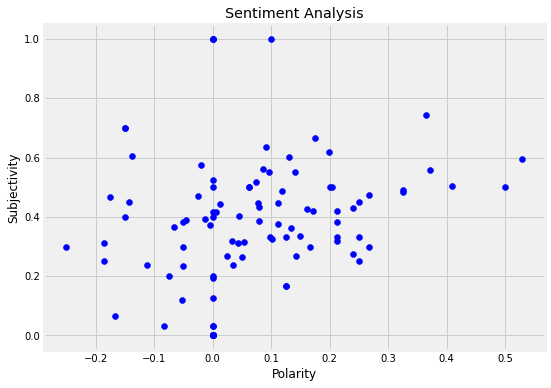

In [26]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [27]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

57.0

In [28]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

23.0

In [29]:
# Show the value counts
df['Analysis'].value_counts()


Positive    57
Negative    23
Neutral     20
Name: Analysis, dtype: int64

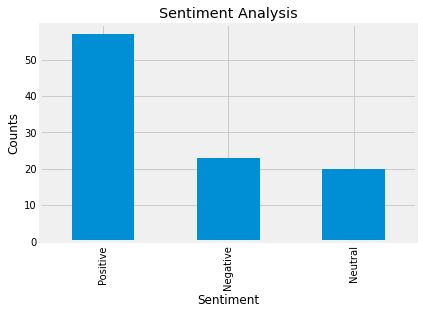

In [30]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()